# Neuroprosthetics Exercise 3 - Alexander Koenig

## Subtask 1 - Solver Implementation

In [30]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['font.family'] = "Arial"
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 11
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 12
rcParams['axes.grid'] = True

In [36]:
ode_rhs = lambda V, t: 1 - V - t
A = lambda t: -1
B = lambda V,t: 1 - t

def explicit_euler(ode_rhs, start_value, start_time, end_time, step_size):
    times = np.arange(start_time, end_time, step_size)
    values = np.zeros(len(times))
    values[0] = start_value
    
    for i in range (1, len(times)):
        values[i] = values[i-1] + ode_rhs(values[i-1], times[i-1]) * step_size
    
    return values, times

def heun(ode_rhs, start_value, start_time, end_time, step_size):
    times = np.arange(start_time, end_time, step_size)
    values = np.zeros(len(times))
    values[0] = start_value
    
    for i in range (1, len(times)):
        A = ode_rhs(values[i-1], times[i-1])
        B = ode_rhs(values[i-1] + A * step_size, times[i])
        values[i] = values[i-1] + (A+B)/2 * step_size
    
    return values, times

def exponential_euler(A, B, start_value, start_time, end_time, step_size):
    times = np.arange(start_time, end_time, step_size)
    values = np.zeros(len(times))
    values[0] = start_value
    
    for i in range (1, len(times)):
        values[i] = values[i-1]*np.exp(A(times[i-1])*step_size) + \
            B(values[i-1], times[i-1])/A(times[i-1])*(np.exp(A(times[i-1])*step_size) - 1)
    
    return values, times

## Subtask 2 - Solve Functions

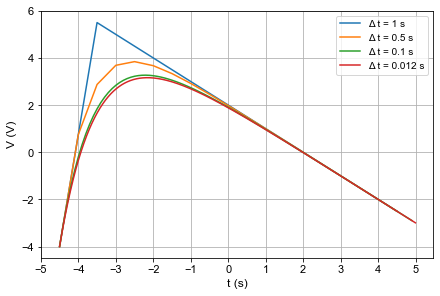

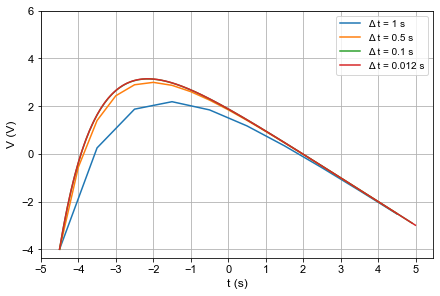

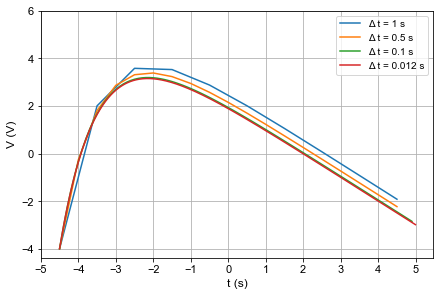

In [59]:
time_steps = [1, 0.5, 0.1, 0.012]

fig = plt.figure(constrained_layout=True)
for time_step in time_steps:
    values, times = explicit_euler(ode_rhs, -4, -4.5, 5, time_step)
    plt.plot(times, values, label=f"\u0394 t = {time_step} s")
plt.xlabel("t (s)")
plt.ylabel("V (V)")
plt.xticks(np.arange(-5, 6, step=1))
plt.yticks(np.arange(-4, 7, step=2))
plt.legend()
plt.show()
fig.savefig('../figures/explicit_euler.pdf')

fig = plt.figure(constrained_layout=True)
for time_step in time_steps:
    values, times = heun(ode_rhs, -4, -4.5, 5, time_step)
    plt.plot(times, values, label=f"\u0394 t = {time_step} s")
plt.xlabel("t (s)")
plt.ylabel("V (V)")
plt.xticks(np.arange(-5, 6, step=1))
plt.yticks(np.arange(-4, 7, step=2))
plt.legend()
plt.show()
fig.savefig('../figures/heun.pdf')

fig = plt.figure(constrained_layout=True)
for time_step in time_steps:
    values, times = exponential_euler(A, B, -4, -4.5, 5, time_step)
    plt.plot(times, values, label=f"\u0394 t = {time_step} s")
plt.xlabel("t (s)")
plt.ylabel("V (V)")
plt.xticks(np.arange(-5, 6, step=1))
plt.yticks(np.arange(-4, 7, step=2))
plt.legend()
plt.show()
fig.savefig('../figures/exponential_euler.pdf')

## Subtask 3 - The Leaky Integrate and Fire Neuron

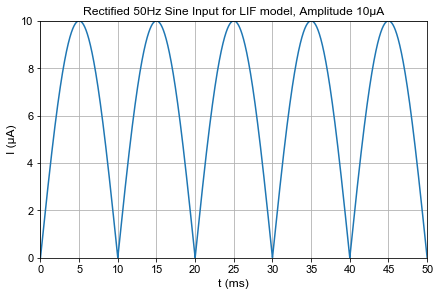

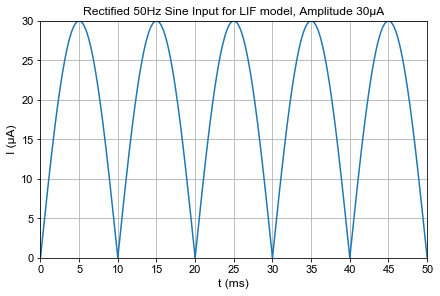

In [60]:
I_1 = lambda t: 10e-6
I_2 = lambda t: 20e-6
I_3 = lambda t: 10e-6 * abs(np.sin(2*np.pi*50*t))
I_4 = lambda t: 30e-6 * abs(np.sin(2*np.pi*50*t))

fig = plt.figure(constrained_layout=True)
times = np.linspace(0, 50e-3, 10000)
values = np.array([I_3(time) for time in times])
plt.plot(times*1e3, values*1e6)
plt.xticks(np.arange(0, 55, 5))
plt.xlim(0, 50)
plt.ylim(0, 10)
plt.xlabel("t (ms)")
plt.ylabel("I (\u00B5A)")
plt.title("Rectified 50Hz Sine Input for LIF model, Amplitude 10\u00B5A")
plt.show()
fig.savefig("../figures/sine_10.pdf")

fig = plt.figure(constrained_layout=True)
times = np.linspace(0, 50e-3, 10000)
values = np.array([I_4(time) for time in times])
plt.plot(times*1e3, values*1e6)
plt.xticks(np.arange(0, 55, 5))
plt.xlim(0, 50)
plt.ylim(0, 30)
plt.xlabel("t (ms)")
plt.ylabel("I (\u00B5A)")
plt.title("Rectified 50Hz Sine Input for LIF model, Amplitude 30\u00B5A")
plt.show()
fig.savefig("../figures/sine_30.pdf")

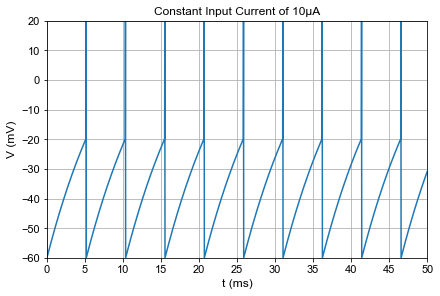

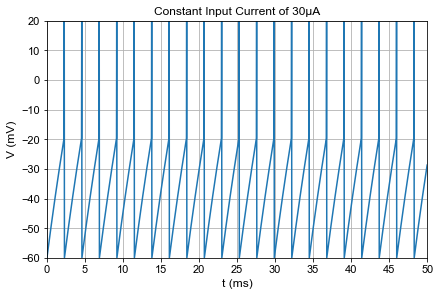

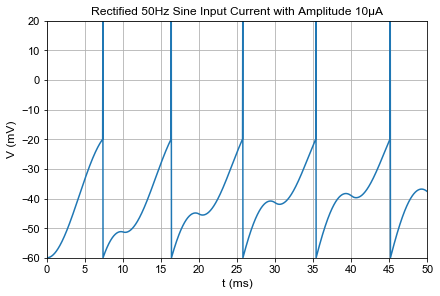

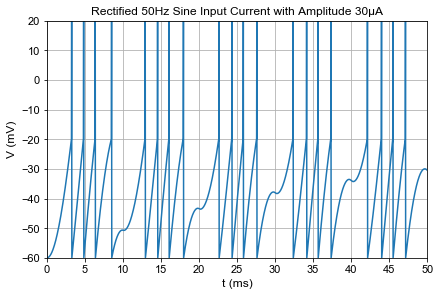

In [61]:
def lif(V_rest, V_thresh, V_spike, start_time, end_time, step_size, C, g, I):
    times = np.arange(start_time, end_time, step_size)
    values = np.zeros(len(times))
    values[0] = V_rest
    
    for i in range (1, len(times)):
        if values[i-1] < V_thresh:
            values[i] = values[i-1] + step_size/C*(-g*(values[i-1]-V_rest) + I(times[i-1]))
        elif V_thresh <= values[i-1] and values[i-1] < V_spike:
            values[i] = V_spike
        elif V_spike <= values[i-1]:
            values[i] = V_rest
    
    return values, times

current_1 = (I_1, "Constant Input Current of 10\u00B5A", "V_const_10.pdf")
current_2 = (I_2, "Constant Input Current of 30\u00B5A", "V_const_30.pdf")
current_3 = (I_3, "Rectified 50Hz Sine Input Current with Amplitude 10\u00B5A", "V_sine_10.pdf")
current_4 = (I_4, "Rectified 50Hz Sine Input Current with Amplitude 30\u00B5A", "V_sine_30.pdf")
currents = [current_1, current_2, current_3, current_4]

for current in currents:
    values, times = lif(-60*1e-3, -20*1e-3, 20*1e-3, 0, 50*1e-3, 25*1e-6, 1*1e-6, 100*1e-6, current[0])
    fig = plt.figure(constrained_layout=True)
    plt.plot(times*1e3, values*1e3)
    plt.xticks(np.arange(0, 55, 5))
    plt.xlim(0, 50)
    plt.ylim(-60, 20)
    plt.xlabel("t (ms)")
    plt.ylabel("V (mV)")
    plt.title(current[1])
    plt.show()
    fig.savefig(f"../figures/{current[2]}")